# Aashray Anand
5/24/2019, 11:20 PM
 
This notebook contains different experiments, working with the
 
NBA stats data from the below blog post, and practicing using pyspark

"Using Apache Spark for Sports Analytics: https://content.pivotal.io/blog/how-data-science-assists-sports"

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark as spark

In [ ]:
total = pd.read_csv('./season_totals.csv')
shots = pd.read_csv('./shot_charts_top_10/top_10_shot_charts_2011_2016.csv')

In [23]:
shots.columns

Index(['Unnamed: 0', 'yr', 'name', 'team_name', 'game_date', 'season',
       'espn_player_id', 'team_id', 'espn_game_id', 'period',
       'minutes_remaining', 'seconds_remaining', 'shot_made_flag',
       'action_type', 'shot_type', 'shot_distance', 'opponent', 'x', 'y',
       'dribbles', 'touch_time', 'defender_name', 'defender_distance',
       'shot_clock'],
      dtype='object')

In [77]:
twenty13steph = shots[(shots['name'] == 'Stephen Curry') & (shots['yr'] == 2013)]

In [78]:
twenty13steph

,Unnamed: 0,yr,name,team_name,game_date,season,espn_player_id,team_id,espn_game_id,period,...,shot_type,shot_distance,opponent,x,y,dribbles,touch_time,defender_name,defender_distance,shot_clock
33309,33309,2013,Stephen Curry,Golden State Warriors,2012-12-08,2012,3975,1610612744,400278003.0,3,...,2PT Field Goal,8,Washington Wizards,-73,36,NaN,NaN,NaN,NaN,NaN
33310,33310,2013,Stephen Curry,Golden State Warriors,2013-02-09,2012,3975,1610612744,400278470.0,4,...,2PT Field Goal,9,Dallas Mavericks,-75,56,NaN,NaN,NaN,NaN,NaN
33311,33311,2013,Stephen Curry,Golden State Warriors,2013-03-04,2012,3975,1610612744,400278615.0,4,...,2PT Field Goal,11,Toronto Raptors,-108,33,NaN,NaN,NaN,NaN,NaN
33312,33312,2013,Stephen Curry,Golden State Warriors,2013-02-09,2012,3975,1610612744,400278470.0,1,...,2PT Field Goal,7,Dallas Mavericks,75,26,NaN,NaN,NaN,NaN,NaN
33313,33313,2013,Stephen Curry,Golden State Warriors,2013-02-06,2012,3975,1610612744,400278449.0,2,...,2PT Field Goal,6,Oklahoma City Thunder,67,15,NaN,NaN,NaN,NaN,NaN
33314,33314,2013,Stephen Curry,Golden State Warriors,2013-02-20,2012,3975,1610612744,400278528.0,4,...,2PT Field Goal,12,Phoenix Suns,-106,67,NaN,NaN,NaN,NaN,NaN
33315,33315,2013,Stephen Curry,Golden State Warriors,2012-11-16,2012,3975,1610612744,400277846.0,3,...,2PT Field Goal,2,Minnesota Timberwolves,0,22,NaN,NaN,NaN,NaN,NaN
33316,33316,2013,Stephen Curry,Golden State Warriors,2012-11-09,2012,3975,1610612744,400277800.0,3,...,2PT Field Goal,2,Los Angeles Lakers,18,17,NaN,NaN,NaN,NaN,NaN
33317,33317,2013,Stephen Curry,Golden State Warriors,2013-03-30,2012,3975,1610612744,400278814.0,1,...,2PT Field Goal,2,Portland Trail Blazers,-16,23,NaN,NaN,NaN,NaN,NaN
33318,33318,2013,Stephen Curry,Golden State Warriors,2013-03-02,2012,3975,1610612744,400278596.0,1,...,2PT Field Goal,2,Philadelphia 76ers,-11,17,NaN,NaN,NaN,NaN,NaN


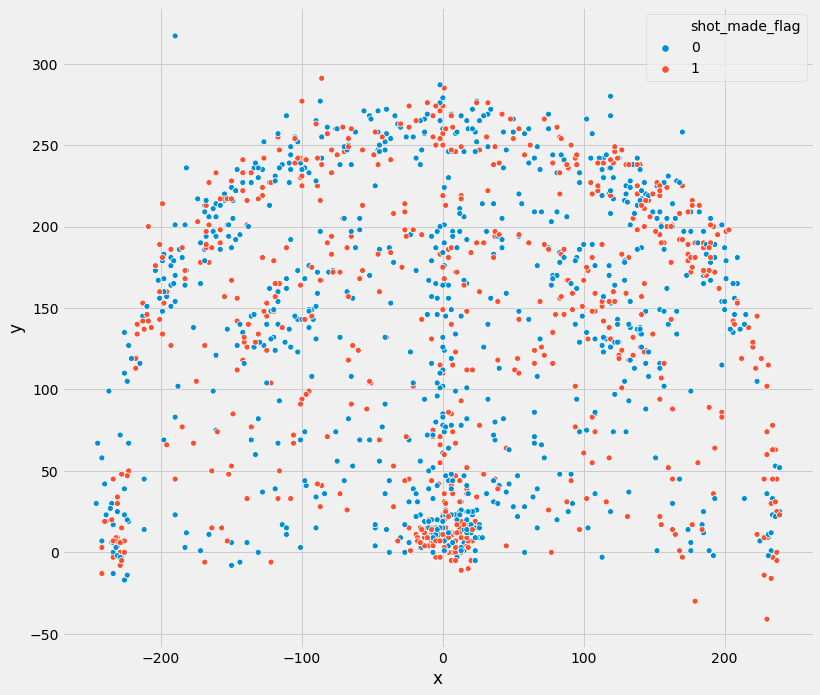

In [29]:
plt.figure(figsize=(12,11))
plt.style.use('fivethirtyeight')
rel_data_steph = twenty13steph[twenty13steph['y'] < 350]
sns.scatterplot(x="x", y="y", data=rel_data_steph, hue='shot_made_flag')

In [ ]:
# we can draw a set of matplotlib shapes on the above plot, to be able to build a more powerful data visualization
from matplotlib.patches import Circle, Rectangle, Arc

def make_court(ax=None, color='black', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()
    elem = []
    rim = Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
    elem.append(rim)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    elem.append(corner_three_a)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    elem.append(corner_three_b)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)
    elem.append(three_arc)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    out

In [71]:
# we can draw a set of matplotlib shapes on the above plot, to be able to build a more powerful data visualization
from matplotlib.patches import Circle, Rectangle, Arc

def make_court(ax=None, color='black', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()
    elem = []
    rim = Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
    elem.append(rim)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    elem.append(corner_three_a)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    elem.append(corner_three_b)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)
    elem.append(three_arc)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    back_bound = Rectangle((-250,-47.5), 500, 0, color=color, linewidth=lw)
    left_bound = Rectangle((-250,-47.5), 0, 470, color=color, linewidth=lw)
    right_bound = Rectangle((250,-47.5), 0, 470, color=color, linewidth=lw)
    center_court = Rectangle((-250, 422.5), 500, 0, color=color, linewidth=lw)
    elem.append(center_inner_arc)
    elem.append(center_outer_arc)
    elem.append(backboard)
    elem.append(outer_box)
    elem.append(inner_box)
    elem.append(top_free_throw)
    elem.append(bottom_free_throw)
    elem.append(restricted)
    elem.append(back_bound)
    elem.append(left_bound)
    elem.append(right_bound)
    elem.append(center_court)
    for e in elem:
        ax.add_patch(e)
    return ax

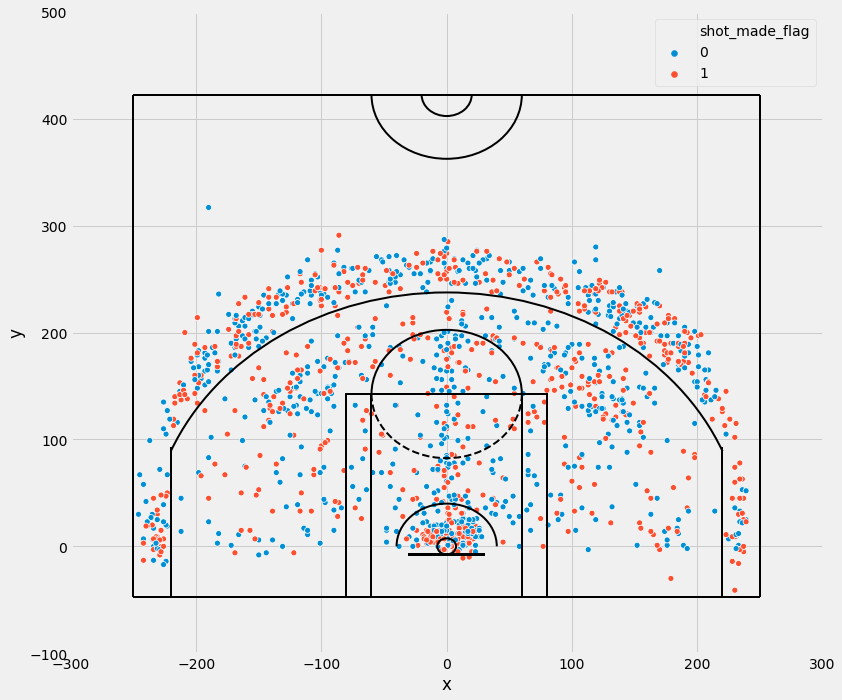

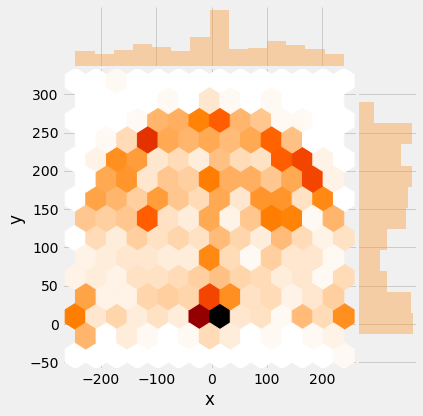

In [76]:
plt.figure(figsize=(12,11))
make_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
sns.scatterplot(x="x", y="y", data=rel_data_steph, hue='shot_made_flag')
cmap=plt.cm.gist_heat_r
sns.jointplot(x="x", y="y", kind="hex", space=0, data=rel_data_steph, color=cmap(0.2), cmap=cmap)
plt.show()